In [1]:
from dataload import preprocess

In [2]:
pre=preprocess()
dataset,testset=pre.preprocessingdata_news()
dataset_str,testset_str,labelset=pre.processingdata_bayes(dataset,testset)


正在数据集删除空数据并分词....


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zrypz\AppData\Local\Temp\jieba.cache
Loading model cost 0.761 seconds.
Prefix dict has been built successfully.


正在删除测试集空数据并分词....


In [3]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
vectorizer=CountVectorizer()
transformer=TfidfTransformer()
tfidf_vec=TfidfVectorizer()

In [5]:
tfidf_matrix_train=tfidf_vec.fit_transform(dataset_str)
tfidf_matrix_test=tfidf_vec.transform(testset_str)

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(tfidf_matrix_train,labelset)
model=MultinomialNB()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
ytest=np.array(ytest)
ypred=np.array(ypred)
print(f"模型准确率为:"+str(accuracy_score(ytest,ypred)))

模型准确率为:0.8762772991384492


Fact-checkAccuracy Is 87.63%


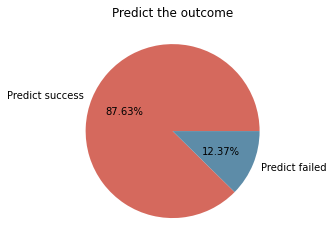

In [10]:
import matplotlib.pyplot as plt
factcheckscore = accuracy_score(ytest,ypred)
print(f'Fact-checkAccuracy Is {round(factcheckscore * 100, 2)}%')

y = np.array([round(factcheckscore * 100, 2), 100 - round(factcheckscore * 100, 2)])
fig = plt.figure()
# 设置背景色
rect = fig.patch
rect.set_facecolor('white')
# 绘制百分比结果图
plt.pie(y,
        labels=['Predict success', 'Predict failed'],
        colors=["#d5695d", "#5d8ca8"],
        autopct='%.2f%%',
        )
plt.title("Predict the outcome")
plt.show()

In [8]:
test_pred=model.predict(tfidf_matrix_test)
np.savetxt('.//result//result_bayes.txt',test_pred,fmt='%d',delimiter='\n');